# 6.1 Average Levels of Exchange Rates, Inflation and Industrial Production Pre and Post Bretton Woods

Contributor(s): Xinyan Liao

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### 6.1.1 Obtaining Germany's Data

In [2]:
df = pd.read_excel("../data/final_df.xlsx")
df = df[df['Country']== 'Germany']
df

,Time,Industrial Production Index,Nominal Exchange Rate,International Reserves (USD),CPI,Country,German Nominal EX Rate Growth,German Real EX Rate Growth,German Real EX Rate Index,Inflation Rate,German Monthly IP Growth,German Annual IP Growth,International Reserves Index
0,1959-12-01,32.500305,4.2000,4811.474341,24.616929,Germany,0.000000,0.340716,1.713301,0.000000,-4.019729,10.900123,101.848342
1,1960-01-01,31.193881,4.2000,4724.155785,24.616929,Germany,0.000000,0.340716,1.707474,0.000000,-4.019729,10.900123,100.000000
2,1960-02-01,31.041599,4.2000,4806.362830,24.477068,Germany,0.000000,-0.910483,1.723091,-0.568147,-0.488181,10.900123,101.740143
3,1960-03-01,32.203755,4.2000,4966.456016,24.477068,Germany,0.000000,0.000000,1.723091,0.000000,3.743868,10.900123,105.128964
4,1960-04-01,34.287622,4.2000,5236.120624,24.616929,Germany,0.000000,0.230208,1.719129,0.571393,6.470881,10.900123,110.837171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1990-08-01,75.964955,1.5707,72425.738573,67.556702,Germany,-4.219769,-4.916377,1.045085,0.311532,-3.590683,6.017897,1533.093782
369,1990-09-01,86.496497,1.5697,73197.573621,67.766509,Germany,-0.063666,-0.585995,1.049889,0.310565,13.863684,5.514275,1549.431834
370,1990-10-01,92.643903,1.5233,75011.926830,68.256049,Germany,-2.955979,-2.881808,1.017646,0.722391,7.107116,6.152998,1587.837706
371,1990-11-01,89.461999,1.4870,76166.074709,68.116177,Germany,-2.382984,-2.841436,0.997672,-0.204922,-3.434553,5.580779,1612.268481


#### 6.1.2 Defining Time Frames for Comparison

In [3]:
df['Time'] = pd.to_datetime(df['Time'])

# Define the time frames for comparison
time_frames = {
    "Short-Term (±1 year)": ("1970-01-01", "1972-12-31"),
    "Medium-Term (±5 years)": ("1966-01-01", "1976-12-31"),
    "Long-Term (±10 years)": ("1961-01-01", "1981-12-31")
}

# Define variable names and their column mappings in the dataframe
variables = {
    "Nominal Exchange Rate": "Nominal Exchange Rate",
    "Real Exchange Rate": "German Real EX Rate Index",
    "Inflation Rate": "Inflation Rate",
    "12-Month Industrial Production Growth": "German Annual IP Growth"
}

# Define the pre and post Bretton Woods cutoff
bretton_woods_cutoff = "1971-08-01"

#### 6.1.3 Plotting Clustered Bar Charts for Each Variable Studied

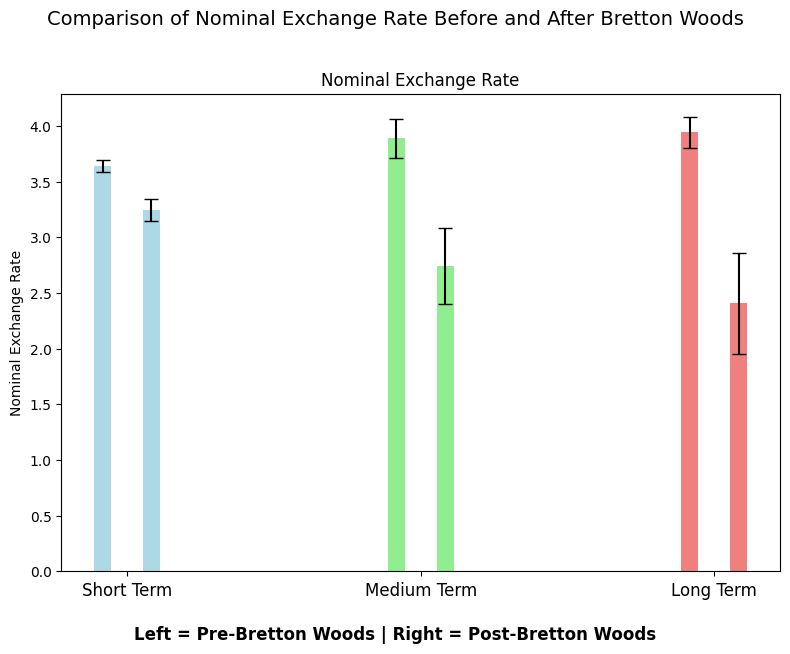

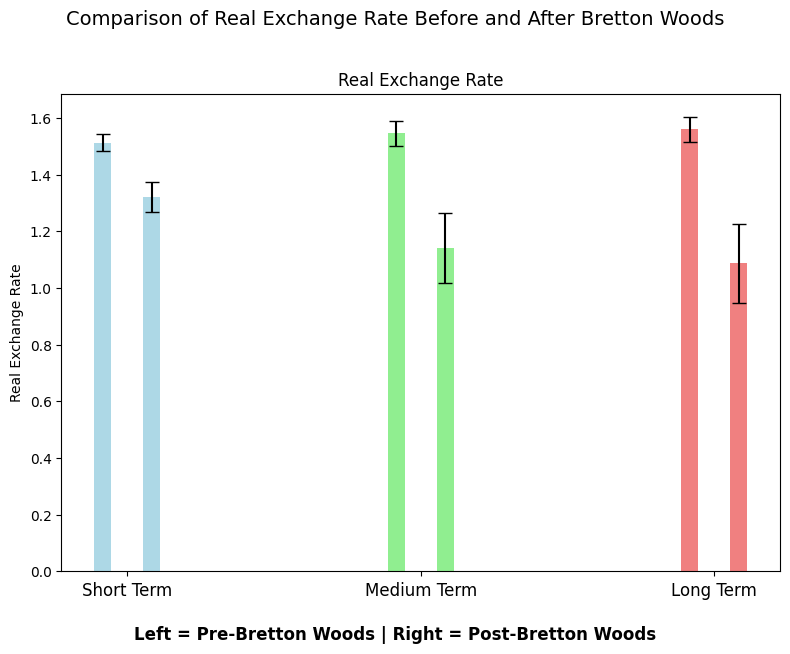

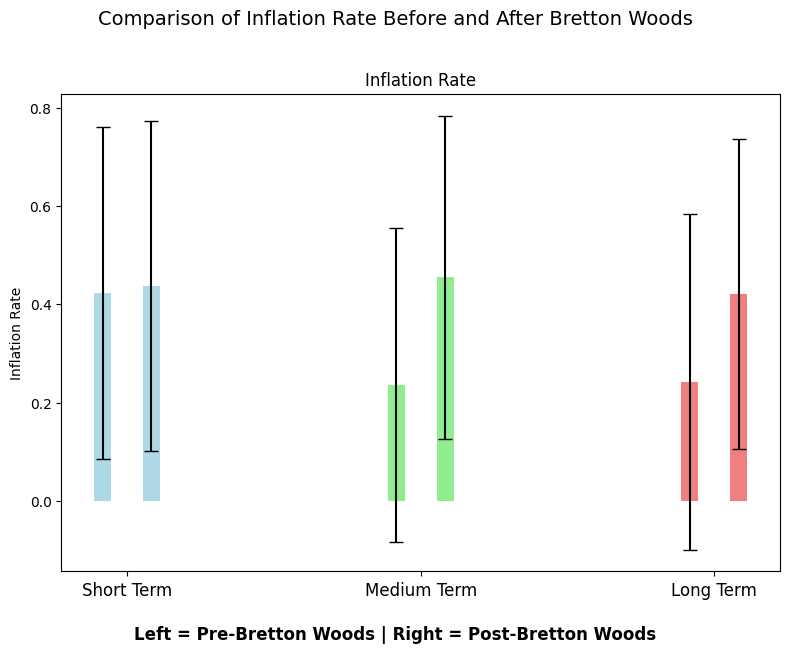

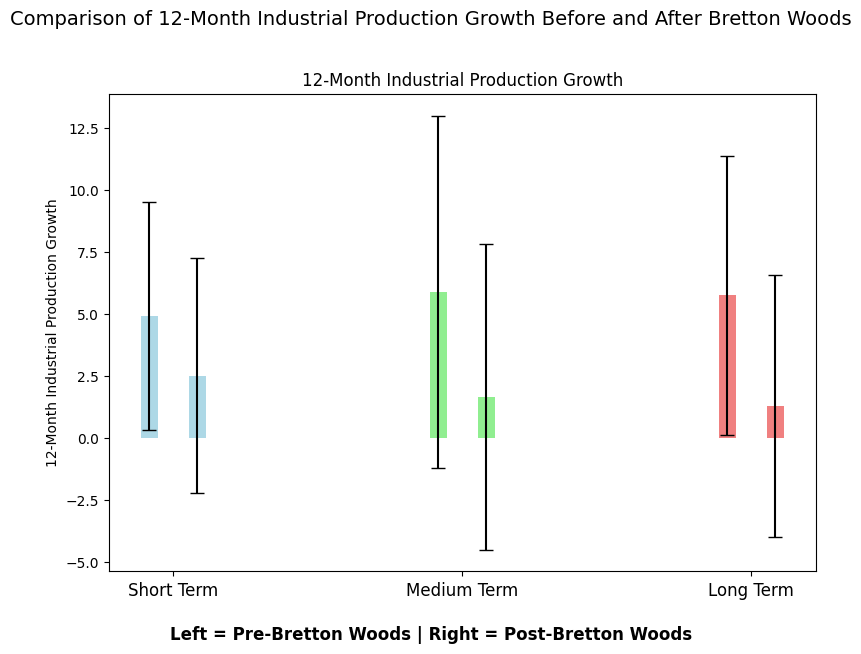

In [4]:
# Function to generate separate bar charts with balanced spacing for annotation
def plot_separate_bar_charts(df, variables, time_frames, bretton_woods_cutoff):
    colors = ['lightblue', 'lightgreen', 'lightcoral']  # Different colors for Short, Medium, Long-Term
    bar_width = 0.35  # Width of each bar
    cluster_spacing = 4  # Spacing between clusters

    # Define proper ordering (Short, Medium, Long)
    ordered_time_frames = ["Short-Term (±1 year)", "Medium-Term (±5 years)", "Long-Term (±10 years)"]

    for var_name, col_name in variables.items():
        fig, ax = plt.subplots(figsize=(8, 6.5))  # Slightly reduce figure height

        means = []
        stds = []
        positions = []  # X-axis positions for bars

        # Calculate positions dynamically to allow spacing between clusters
        base_positions = np.array([1, 2])  # Base positions for Pre and Post within each cluster

        for i, tf_name in enumerate(ordered_time_frames):
            start, end = time_frames[tf_name]
            pre_bw = df[(df["Time"] >= start) & (df["Time"] < bretton_woods_cutoff)][col_name].dropna()
            post_bw = df[(df["Time"] >= bretton_woods_cutoff) & (df["Time"] <= end)][col_name].dropna()

            means.append([pre_bw.mean(), post_bw.mean()])
            stds.append([pre_bw.std(), post_bw.std()])
            positions.append(base_positions + (i * (len(base_positions) + cluster_spacing)))

        # Convert lists to NumPy arrays for easy manipulation
        means = np.array(means)
        stds = np.array(stds)
        positions = np.array(positions)

        # Flatten positions array for bar plotting
        flat_positions = positions.flatten()
        flat_means = means.flatten()
        flat_stds = stds.flatten()

        # Create simple labels for X-axis (Short Term, Medium Term, Long Term)
        x_labels = ["Short Term", "Medium Term", "Long Term"]
        x_label_positions = positions.mean(axis=1)  # Position labels in center of each cluster

        # Plot bars with better spacing
        for i in range(len(flat_positions) // 2):
            ax.bar(flat_positions[i * 2], flat_means[i * 2], bar_width, yerr=flat_stds[i * 2],
                   color=colors[i], capsize=5)
            ax.bar(flat_positions[i * 2 + 1], flat_means[i * 2 + 1], bar_width, yerr=flat_stds[i * 2 + 1],
                   color=colors[i], capsize=5)

        ax.set_title(var_name)
        ax.set_ylabel(var_name)
        ax.set_xticks(x_label_positions)
        ax.set_xticklabels(x_labels, fontsize=12)

        # Add annotation for clarity with **balanced spacing**
        plt.figtext(0.5, 0.01, "Left = Pre-Bretton Woods | Right = Post-Bretton Woods", 
                    ha="center", fontsize=12, fontweight="bold")

        plt.suptitle(f"Comparison of {var_name} Before and After Bretton Woods", fontsize=14)
        plt.tight_layout(rect=[0, 0.05, 1, 0.96])  # Adjust bottom spacing to balance annotation space
        plt.show()

# Generate **four separate** bar charts (one per variable) with improved spacing
plot_separate_bar_charts(df, variables, time_frames, bretton_woods_cutoff)
